<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/saif/M2_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://proceedings.scipy.org/articles/Majora-7b98e3ed-003).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1M4LO6727OIpa4_IXeWQKmUbN9nMpfDDJ/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [3]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [47]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
import seaborn as sns #seaborn
import re

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [6]:
# YOUR CODE HERE
# Tess Data
tess_wav_files = glob.glob("Tess/*/*.wav")

# Ravdess Data
ravdess_wav_files = glob.glob("ravdess/*/*.wav")

print(f"Number of TESS audio files: {len(tess_wav_files)}")
print(f"Number of RAVDESS audio files: {len(ravdess_wav_files)}")

Number of TESS audio files: 2679
Number of RAVDESS audio files: 1168


#### Play the sample audio

In [9]:
# YOUR CODE HERE
sample_tess_file = tess_wav_files[0]
print(f"Sample TESS audio files: {sample_tess_file}")

sample_ravdess_file = ravdess_wav_files[0]
print(f"Sample Ravdess audio files: {sample_ravdess_file}")

tess_audio, tess_sr = librosa.load(sample_tess_file) #Loading Audio file into waveform using Librosa and store sample rate
ipd.Audio(tess_audio, rate=tess_sr) #Playing Audio using iPython by taking sample rate and waveform

#ravdess_audio, ravdess_sr = librosa.load(sample_ravdess_file)
#ipd.Audio(ravdess_audio, rate= ravdess_sr)

Sample TESS audio files: Tess/YAF_sad/YAF_keep_sad.wav
Sample Ravdess audio files: ravdess/Actor_17/03-01-04-02-02-01-17_sad.wav


### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

Emotions of TESS audio files: {'surprised', 'happy', 'angry', 'disgust', 'neutral', 'fear', 'sad'}
Emotions of RAVDESS audio files: {'surprised', 'happy', 'angry', 'disgust', 'neutral', 'fear', 'sad'}


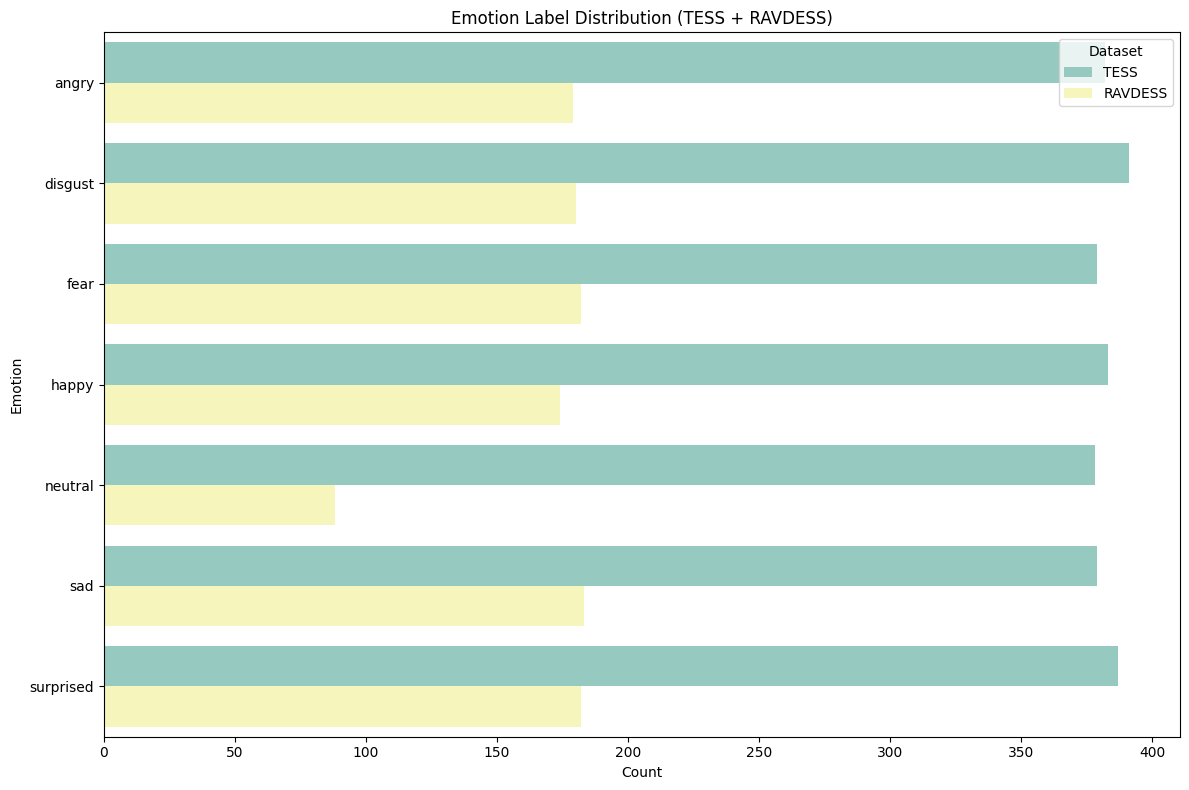

In [10]:
# YOUR CODE HERE
# Parse emotion labels for the TESS dataset based on the filename structure
tess_emotion_labels = {
    'angry': 'angry',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happy',
    'surprised': 'surprised',
    'sad': 'sadness',
    'neutral': 'neutral'
}

tess_emotions = []
for file in tess_wav_files:
    for emotion in tess_emotion_labels:
        if emotion in file.lower():
            tess_emotions.append(emotion)
            break

# Parse emotion labels for the RAVDESS dataset
ravdess_emotion_labels = {
    'neutral': 'neutral',
    'calm': 'calm',
    'happy': 'happy',
    'sad': 'sad',
    'angry': 'angry',
    'fear': 'fear',
    'disgust': 'disgust',
    'surprised': 'surprised'
}

ravdess_emotions = []
for file in ravdess_wav_files:
    for emotion in ravdess_emotion_labels:
        if emotion in file.lower():
            ravdess_emotions.append(emotion)
            break

print(f"Emotions of TESS audio files: {set(tess_emotions)}")
print(f"Emotions of RAVDESS audio files: {set(ravdess_emotions)}")

#Make dataframe
tess_df = pd.DataFrame({'Emotion': tess_emotions, 'Dataset': ['TESS'] * len(tess_emotions)})
ravdess_df = pd.DataFrame({'Emotion': ravdess_emotions, 'Dataset': ['RAVDESS'] * len(ravdess_emotions)})
all_emotions_df = pd.concat([tess_df, ravdess_df])

# Plotting the distribution using a countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=all_emotions_df, y='Emotion', hue='Dataset', palette='Set3', order=sorted(set(all_emotions_df['Emotion'])))

plt.title('Emotion Label Distribution (TESS + RAVDESS)')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.legend(title='Dataset', loc='upper right')

plt.tight_layout()
plt.show()

#### Visualize sample audio signal using librosa

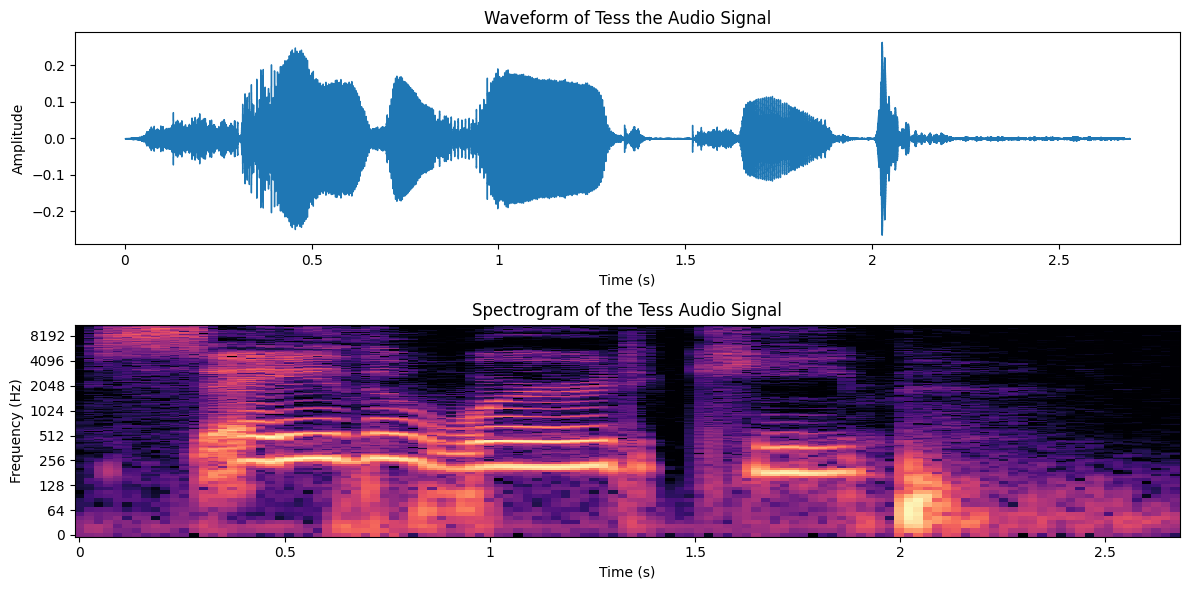

In [11]:
# YOUR CODE HERE
tess_audio, tess_sr = librosa.load(sample_tess_file)  # sr=None to preserve the original sample rate

plt.figure(figsize=(12, 6))
# Plot the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(tess_audio, sr=tess_sr)
plt.title('Waveform of Tess the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(librosa.stft(tess_audio), ref=np.max)  # Compute the spectrogram and convert to dB
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=tess_sr)
plt.title('Spectrogram of the Tess Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

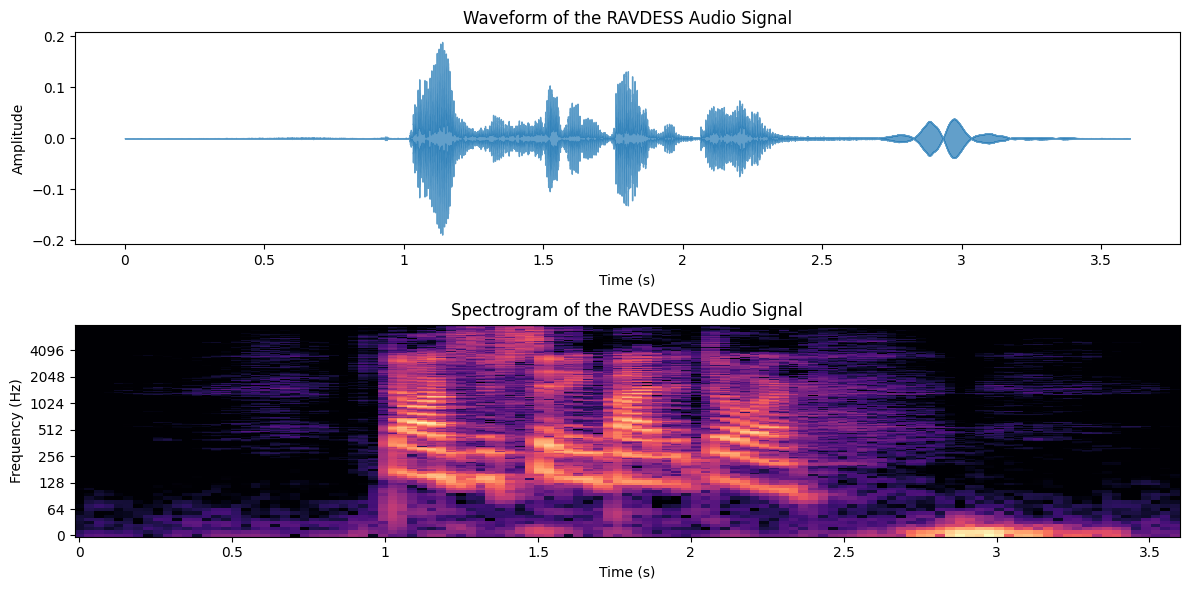

In [12]:
# YOUR CODE HERE
ravdess_audio, ravdess_sr = librosa.load(sample_ravdess_file, sr=None)

plt.figure(figsize=(12, 6))
# Plot the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(ravdess_audio, sr=ravdess_sr, alpha=0.7)
plt.title('Waveform of the RAVDESS Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(librosa.stft(ravdess_audio), ref=np.max)
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=ravdess_sr)
plt.title('Spectrogram of the RAVDESS Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [13]:
# YOUR CODE HERE
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft() / short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute mfcc / The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine / Chroma features are a powerful tool for analyzing audio whose pitches can be meaningfully categorized (often into twelve categories)
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine / A Mel spectrogram is a spectrogram where the frequencies are converted to the Mel scale. Mel scale is a scale of pitches judged by listeners to be equal in distance one from another.
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [14]:
tsample_feature = extract_feature(tess_wav_files[0]) #,mfcc=True, chroma=True, mel=True)
tsample_feature.shape

(180,)

In [15]:
rsample_feature = extract_feature(ravdess_wav_files[0]) #,mfcc=True, chroma=True, mel=True)
rsample_feature.shape

(180,)

In [16]:
print(type(tsample_feature))
print(type(rsample_feature))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Create a dictionary or a function to encode the emotions

In [17]:
# YOUR CODE HERE
emotion_dict = {
    'neutral': 0,
    'calm': 1,
    'happy': 2,
    'sad': 3,
    'angry': 4,
    'fear': 5,
    'disgust': 6,
    'surprised': 7
}
emotion_dict

{'neutral': 0,
 'calm': 1,
 'happy': 2,
 'sad': 3,
 'angry': 4,
 'fear': 5,
 'disgust': 6,
 'surprised': 7}

#### TESS data feature extraction

In [29]:
# YOUR CODE HERE
tfeatures, tlabels = [], []

for wv_file in tess_wav_files:
  tfeatures.append(extract_feature(wv_file))
  # extracting label
  emt = re.sub('[0-9]*', '', wv_file.split("_")[-1].split(".")[0])
  tlabels.append(emotion_dict [emt])
  len(tfeatures), len(tlabels)

In [30]:
  print(set(tlabels))

{0, 2, 3, 4, 5, 6, 7}


#### Ravdess data feature extraction

In [23]:
# YOUR CODE HERE
rfeatures, rlabels = [], []

for wv_file in ravdess_wav_files:
  rfeatures.append(extract_feature(wv_file))
  # extracting label
  emt = re.sub('[0-9]*', '', wv_file.split("_")[-1].split(".")[0])
  rlabels.append(emotion_dict [emt])
  len(rfeatures), len(rlabels)

In [25]:
print(set(rlabels))

{0, 2, 3, 4, 5, 6, 7}


#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [31]:
print("TESS features length:", len(tfeatures))
print("TESS labels length:", len(tlabels))

print("RAVDESS features length:", len(rfeatures))
print("RAVDESS labels length:", len(rlabels))

TESS features length: 2679
TESS labels length: 2679
RAVDESS features length: 1168
RAVDESS labels length: 1168


In [33]:
# YOUR CODE HERE
features = tfeatures + rfeatures
labels = tlabels + rlabels

features = np.array(features)
df = pd.DataFrame(features) #all features df

print("Total features length:", len(features))
print("Total labels length:", len(labels))

df['Emotion'] = labels #all labels

df.to_csv('emotion_features.csv', index=False) #save csv file

print(df.head())

df.describe()

Total features length: 3847
Total labels length: 3847
            0          1          2          3         4         5         6  \
0 -432.685852  66.423515  35.729851  41.679497  5.037009  9.064569  5.819996   
1 -377.235809  61.407970  25.594427  35.189175 -2.198201  1.807129 -6.850845   
2 -414.417969  41.295948  24.758556  37.620247 -4.979134  6.826155 -3.645178   
3 -392.246216  56.270042  29.559902  43.481831  1.667145  3.180357  2.530952   
4 -387.642365  66.393913  23.748774  19.525841  0.320236  9.053211 -9.025151   

           7         8         9  ...       171       172       173       174  \
0  -8.229791  4.050040 -3.420270  ...  0.006098  0.006831  0.006221  0.003841   
1  -6.227483  3.120285 -7.274498  ...  0.011393  0.012997  0.015501  0.014174   
2  -8.358351  3.052444 -4.245794  ...  0.010885  0.009880  0.009660  0.014609   
3  -9.447951 -0.744949 -5.679958  ...  0.011994  0.016120  0.014393  0.011615   
4 -13.177671  1.568034 -9.770269  ...  0.011960  0.013067  0

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,...,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3.847000e+03,3847.000000
mean,-460.214752,59.747079,-1.879134,12.172906,-5.343070,1.619073,-9.577650,-7.457726,-9.733956,-1.286956,...,4.093374e-03,5.086430e-03,5.529459e-03,3.636722e-03,2.198000e-03,2.502661e-03,3.243325e-03,2.466718e-03,2.446700e-04,3.966207
std,112.577755,20.494581,19.600271,14.383165,11.605112,7.255431,6.996789,7.565977,6.293464,4.849069,...,8.873663e-03,1.130870e-02,1.226437e-02,7.916953e-03,4.764322e-03,5.873863e-03,7.640037e-03,5.741933e-03,5.720989e-04,2.175814
min,-850.545532,-5.788205,-70.718346,-36.367367,-42.819569,-21.298365,-33.407482,-32.080994,-27.359287,-20.521803,...,1.291777e-18,7.624532e-19,6.720349e-19,8.055683e-19,1.256994e-18,1.490963e-18,5.609751e-18,3.232121e-18,8.785235e-19,0.000000
25%,-528.890442,45.714979,-15.411132,2.214934,-13.665520,-3.472782,-14.439126,-12.842228,-14.450052,-4.464886,...,1.278479e-12,1.166046e-12,1.116445e-12,1.050311e-12,9.780466e-13,9.286032e-13,9.083483e-13,8.939241e-13,8.846408e-13,2.000000
50%,-435.216949,61.639233,-3.668871,14.044607,-5.312696,1.472339,-9.341780,-7.310860,-10.110882,-1.262750,...,4.977612e-04,4.495832e-04,4.152628e-04,3.574113e-04,3.050734e-04,2.747398e-04,2.171390e-04,1.076759e-04,7.952726e-06,4.000000
75%,-383.931961,74.611492,14.256922,22.420784,2.381772,6.756149,-4.534462,-1.332709,-5.459827,1.988098,...,4.474902e-03,5.478816e-03,5.964369e-03,3.903355e-03,2.143865e-03,2.268472e-03,2.758072e-03,2.092252e-03,2.095018e-04,6.000000
max,-232.847443,118.675613,46.876213,52.708889,25.684244,31.418659,13.893981,10.955551,11.274470,23.916901,...,1.396472e-01,1.472852e-01,1.707770e-01,1.096495e-01,6.086355e-02,7.008879e-02,8.140542e-02,5.929838e-02,8.565439e-03,7.000000


#### Split the data into train and test

In [34]:
# YOUR CODE HERE
X = df.drop(columns=['Emotion']) # Features
y = df['Emotion']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2885, 180)
Testing set size: (962, 180)


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [54]:
# YOUR CODE HERE
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train) # Train the model

y_pred_dt = dt_model.predict(X_test) # Make predictions on the test set

print(f"Classification Report for Decision Tree:\n{classification_report(y_test, y_pred_dt)}") # Print the classification report


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       120
           2       0.72      0.65      0.68       136
           3       0.77      0.77      0.77       153
           4       0.84      0.86      0.85       132
           5       0.74      0.72      0.73       150
           6       0.65      0.66      0.66       125
           7       0.62      0.67      0.64       146

    accuracy                           0.74       962
   macro avg       0.75      0.75      0.75       962
weighted avg       0.74      0.74      0.74       962



In [53]:
# YOUR CODE HERE
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train) # Train the model

y_pred_rf = rf_model.predict(X_test) # Make predictions on the test set

print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred_rf)}") # Print the classification report

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       120
           2       0.93      0.74      0.82       136
           3       0.81      0.87      0.84       153
           4       0.91      0.91      0.91       132
           5       0.92      0.88      0.90       150
           6       0.77      0.85      0.81       125
           7       0.80      0.86      0.83       146

    accuracy                           0.86       962
   macro avg       0.87      0.86      0.86       962
weighted avg       0.87      0.86      0.86       962



In [52]:
# YOUR CODE HERE
#Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

logreg_model.fit(X_train, y_train) # Train the model

y_pred_logreg = logreg_model.predict(X_test) # Make predictions on the test set

print(f"Classification Report for Logistic Regression:\n{classification_report(y_test, y_pred_logreg)}") # Print the classification report

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       120
           2       0.68      0.63      0.66       136
           3       0.84      0.80      0.82       153
           4       0.81      0.85      0.83       132
           5       0.79      0.74      0.76       150
           6       0.76      0.82      0.79       125
           7       0.77      0.79      0.78       146

    accuracy                           0.78       962
   macro avg       0.78      0.79      0.78       962
weighted avg       0.78      0.78      0.78       962



In [57]:
# YOUR CODE HERE
#Support Vector Machine (SVM)
svm_model = SVC(probability=True,random_state=42)

svm_model.fit(X_train, y_train) # Train the model

y_pred_svm = svm_model.predict(X_test) # Make predictions on the test set

print(f"Classification Report for SVM:\n{classification_report(y_test, y_pred_svm)}") # Print the classification report

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       120
           2       0.97      0.28      0.43       136
           3       0.64      0.88      0.74       153
           4       0.79      0.86      0.82       132
           5       1.00      0.66      0.80       150
           6       0.37      0.81      0.51       125
           7       0.77      0.51      0.62       146

    accuracy                           0.69       962
   macro avg       0.79      0.69      0.69       962
weighted avg       0.79      0.69      0.69       962



In [58]:
# YOUR CODE HERE
#Cross validation
cv_accuracy_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for Decision Tree: {cv_accuracy_dt:.4f}")

cv_accuracy_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for Random Forest: {cv_accuracy_rf:.4f}")

cv_accuracy_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for Logistic Regression: {cv_accuracy_logreg:.4f}")

cv_accuracy_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy for SVM: {cv_accuracy_svm:.4f}")

Cross-Validation Accuracy for Decision Tree: 0.7338
Cross-Validation Accuracy for Random Forest: 0.8471
Cross-Validation Accuracy for Logistic Regression: 0.7906
Cross-Validation Accuracy for SVM: 0.6690


#### Apply the voting classifier

In [62]:
# YOUR CODE HERE
# Soft Voting
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('logreg', logreg_model),
    ('svm', svm_model)
], voting='soft')  # 'soft' for averaging predicted probabilities

voting_clf.fit(X_train, y_train) # Train
y_pred_voting = voting_clf.predict(X_test) # Predicting
print(f"Classification Report for Soft Voting Classifier:\n{classification_report(y_test, y_pred_voting)}")

Classification Report for Soft Voting Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       120
           2       0.82      0.69      0.75       136
           3       0.75      0.83      0.79       153
           4       0.86      0.92      0.89       132
           5       0.80      0.73      0.77       150
           6       0.75      0.78      0.77       125
           7       0.75      0.78      0.76       146

    accuracy                           0.80       962
   macro avg       0.81      0.80      0.80       962
weighted avg       0.80      0.80      0.80       962



In [61]:
# Hard Voting
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('logreg', logreg_model),
    ('svm', svm_model)
], voting='hard')  # 'Hard' for  majority class label

voting_clf.fit(X_train, y_train) # Train
y_pred_voting = voting_clf.predict(X_test) # Predicting
print(f"Classification Report for Hard Voting Classifier:\n{classification_report(y_test, y_pred_voting)}")

Classification Report for Hard Voting Classifier:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       120
           2       0.82      0.71      0.76       136
           3       0.75      0.88      0.81       153
           4       0.86      0.90      0.88       132
           5       0.92      0.76      0.83       150
           6       0.71      0.84      0.77       125
           7       0.86      0.76      0.81       146

    accuracy                           0.82       962
   macro avg       0.83      0.82      0.82       962
weighted avg       0.83      0.82      0.82       962



### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
# YOUR CODE HERE

#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE

#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE

#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL =

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
